In [1]:
# import the library
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# Read CSV file 
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head(10)

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   
5       CONFIRMED              0              0              0              0   
6       CONFIRMED              0              0              0              0   
7       CONFIRMED              0              0              0              0   
8       CONFIRMED              0              1              0              0   
9       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   
5    2.566589     1.780000e-05    -1.780000e-05   179.554370   
6   16.068647     1.090000e-05    -1.090000e-05   173.621937   
7    2.470613     2.700000e-08    -2.700000e-08   122.763305   
8    2.204735     4.300000e-08    -4.300000e-08   121.358542   
9    3.522498     1.980000e-07    -1.980000e-07   121.119423   

   koi_time0bk_err1  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0          0.003520  ...             -81      4.467           0.064   
1          0.000581  ...            -176      4.544           0.044   
2          0.000115  ...            -174      4.564           0.053   
3          0.001130  ...            -211      4.438           0.070   
4          0.001900  ...            -232      4.486           0.054   
5          0.004610  ...            -232      4.486           0.054   
6          0.000517  ...             -83      4.485           0.083   
7          0.000009  ...             -78      4.457           0.024   
8          0.000016  ...             -89      4.019           0.033   
9          0.000047  ...            -137      4.169           0.055   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   
5          -0.229     0.972          0.315         -0.105  296.28613   
6          -0.028     0.848          0.033         -0.072  286.99948   
7          -0.024     0.964          0.038         -0.038  286.80847   
8          -0.027     1.952          0.099         -0.110  292.24728   
9          -0.045     1.451          0.110         -0.110  281.28812   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  
5  48.224670      15.714  
6  48.375790      15.841  
7  49.316399      11.338  
8  47.969521      10.463  
9  42.451080      13.563  

[10 rows x 41 columns]

In [3]:
# Visualizing data

# Select features (columns)

In [4]:
# Set features
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features = df

# Create a Train Test Split
Use koi_disposition for the y values

In [5]:
# Assign x and y values
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

print(X.shape, y.shape)

(6991, 40) (6991,)


In [6]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=115, stratify=y)

In [7]:
X_train.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
2700              0              0              0              0   31.804760   
21                0              0              0              0    4.280964   
5040              0              1              1              0    0.829019   
2795              0              0              1              0    1.387838   
1765              0              0              0              0   14.383227   

      koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
2700         0.000091        -0.000091    190.25413           0.00224   
21           0.000006        -0.000006    171.89659           0.00115   
5040         0.000002        -0.000002    131.46667           0.00401   
2795         0.000006        -0.000006    132.11351           0.00318   
1765         0.000086        -0.000086    140.57648           0.00530   

      koi_time0bk_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
2700          -0.00224  ...            -128      4.235           0.143   
21            -0.00115  ...            -169      4.564           0.032   
5040          -0.00401  ...            -255      4.271           0.124   
2795          -0.00318  ...            -219      4.442           0.054   
1765          -0.00530  ...            -135      4.249           0.137   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
2700          -0.117     1.356          0.212         -0.259  287.62082   
21            -0.168     0.831          0.207         -0.069  294.26581   
5040          -0.186     1.328          0.408         -0.220  296.03485   
2795          -0.216     1.044          0.335         -0.112  295.64212   
1765          -0.112     1.291          0.216         -0.216  290.08276   

            dec  koi_kepmag  
2700  43.141647      13.178  
21    49.314091      15.356  
5040  45.490822      14.661  
2795  48.773071      15.167  
1765  50.863480      13.312  

[5 rows x 40 columns]

# Pre-processing


In [8]:
# Scale the data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train Model - Neural Network
Use Neural Network model

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# Step 1: Label encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [11]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [12]:
print(label_encoder.classes_)

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']


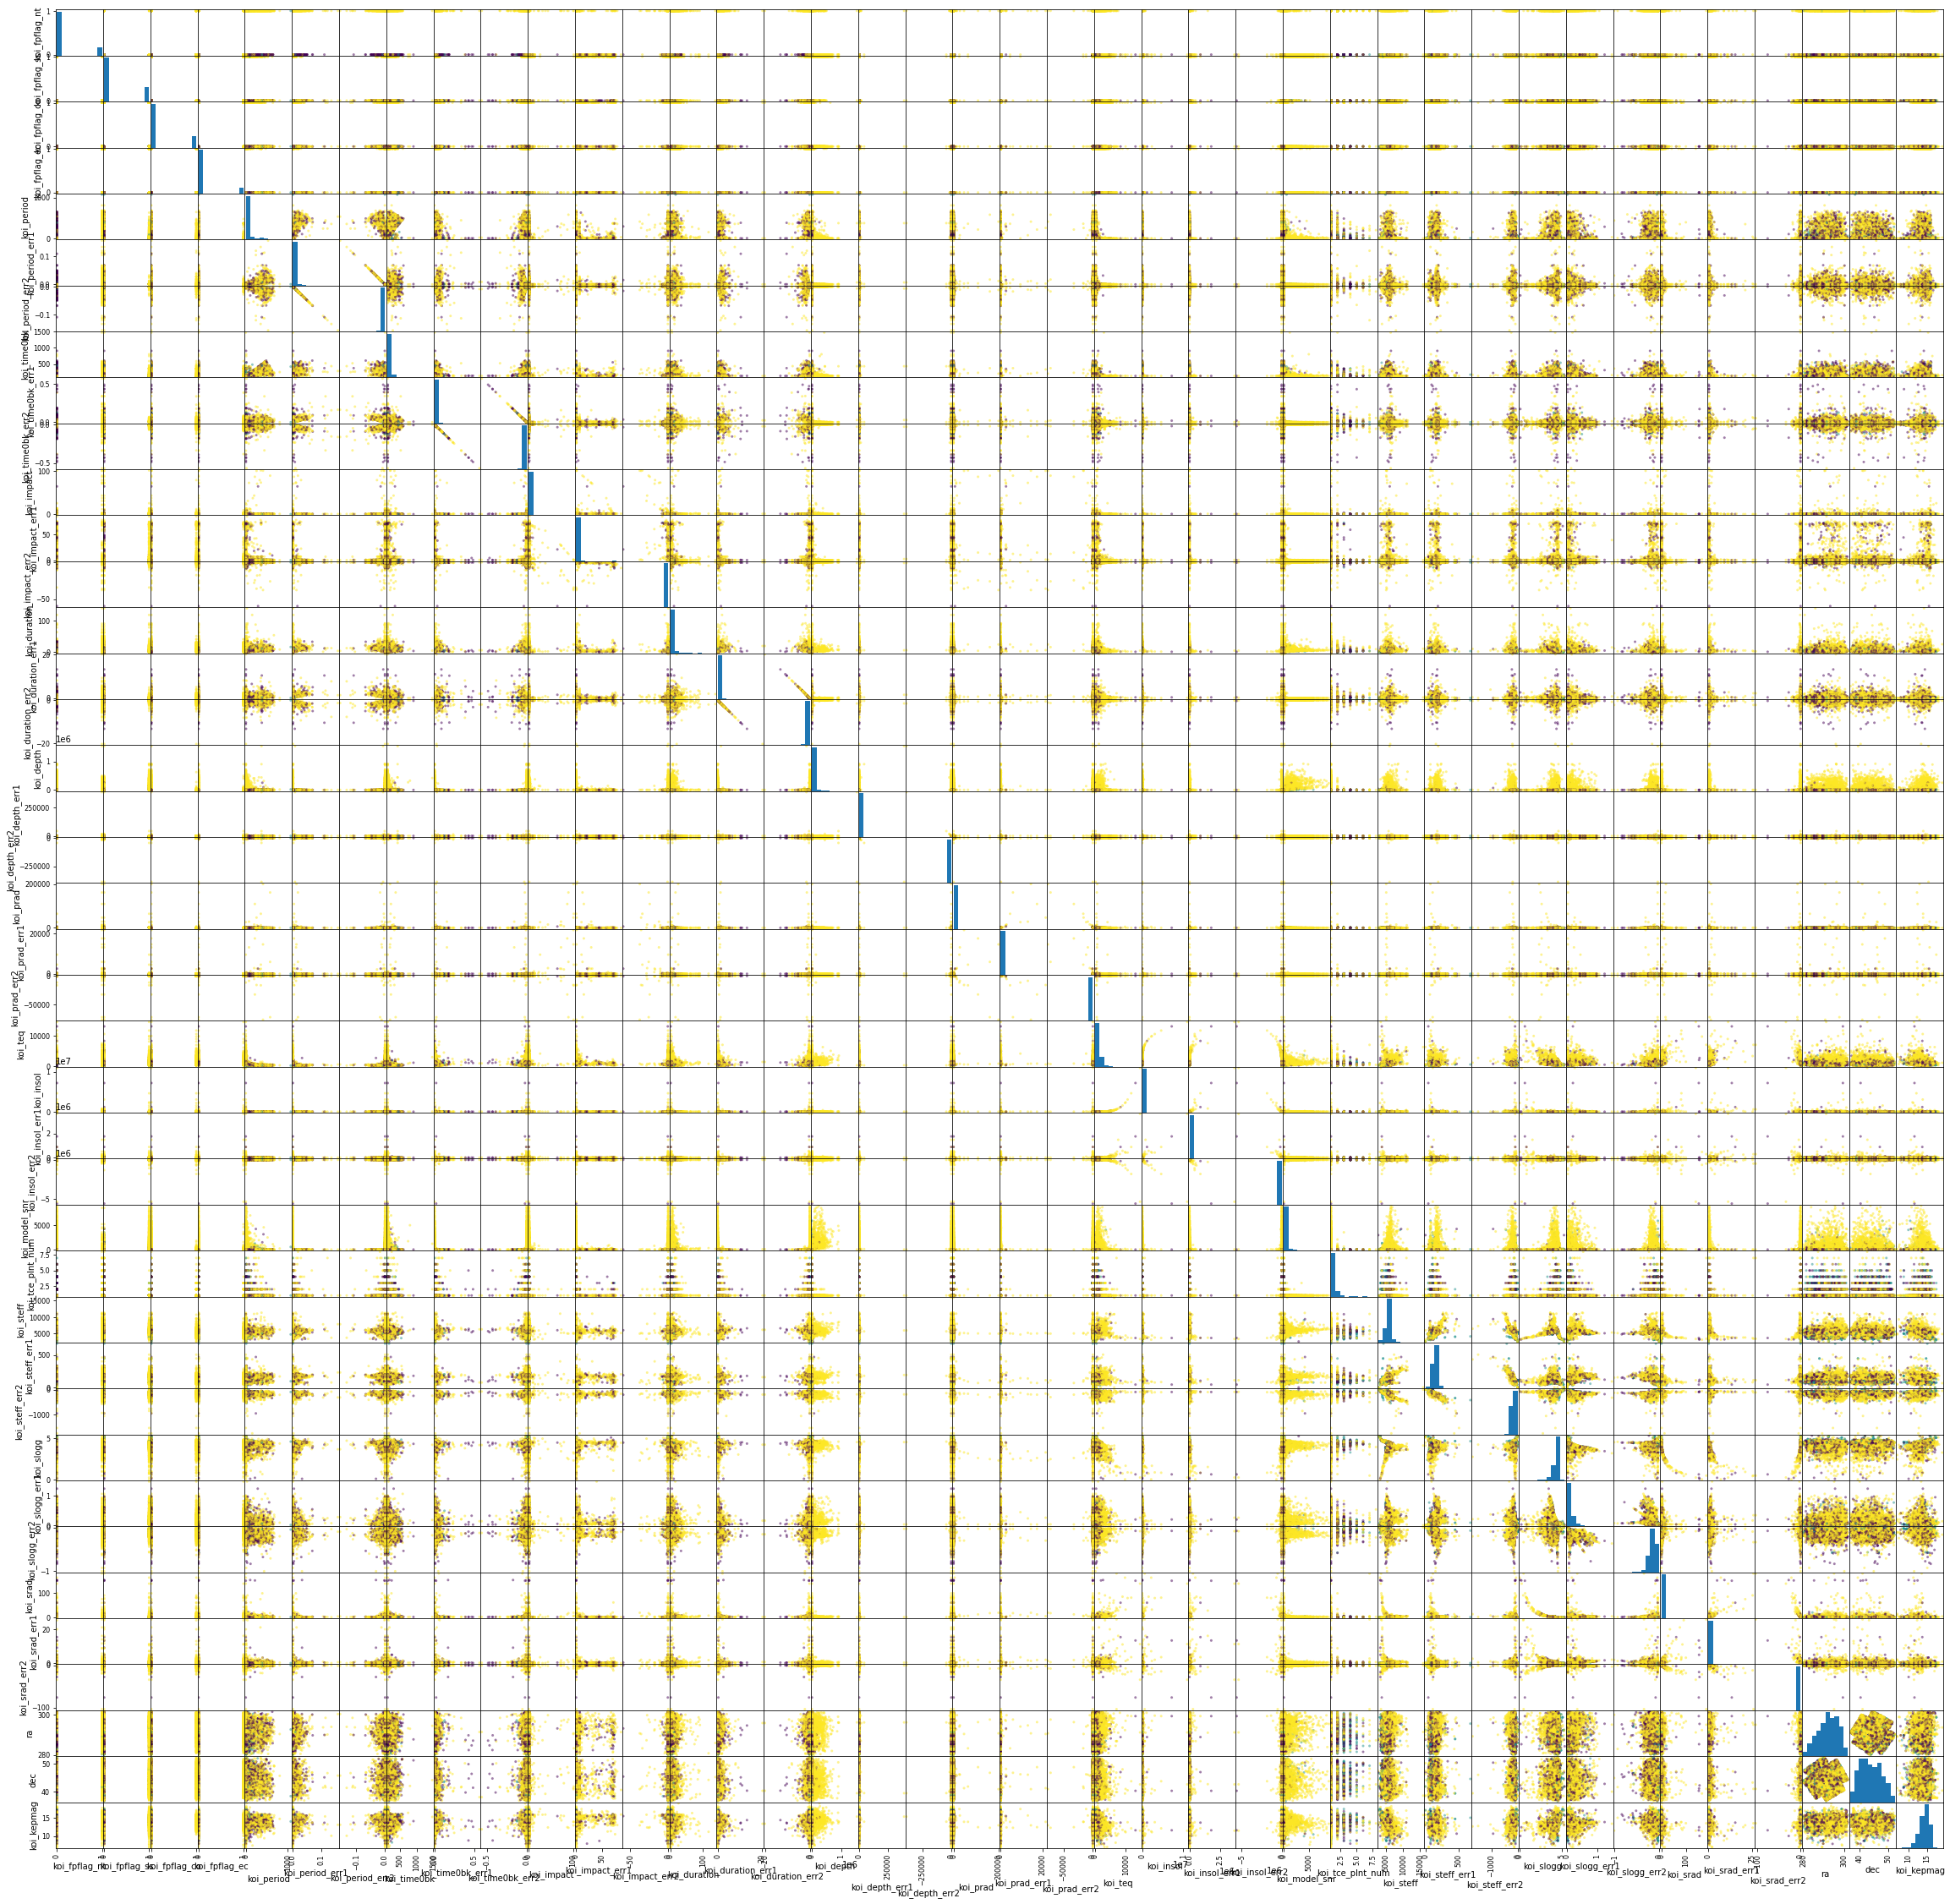

In [13]:
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
pd.plotting.scatter_matrix(X, c=encoded_y, figsize=(40, 40));

In [14]:
# first, create a normal neural network 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=40))
model.add(Dense(units=3, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                410       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)


Epoch 1/100
164/164 - 1s - loss: 1.0338 - accuracy: 0.4969
Epoch 2/100
164/164 - 0s - loss: 0.8681 - accuracy: 0.5951
Epoch 3/100
164/164 - 0s - loss: 0.7014 - accuracy: 0.7393
Epoch 4/100
164/164 - 0s - loss: 0.5785 - accuracy: 0.7555
Epoch 5/100
164/164 - 0s - loss: 0.5054 - accuracy: 0.7728
Epoch 6/100
164/164 - 0s - loss: 0.4622 - accuracy: 0.7887
Epoch 7/100
164/164 - 0s - loss: 0.4362 - accuracy: 0.7995
Epoch 8/100
164/164 - 0s - loss: 0.4186 - accuracy: 0.8062
Epoch 9/100
164/164 - 0s - loss: 0.4002 - accuracy: 0.8241
Epoch 10/100
164/164 - 0s - loss: 0.3859 - accuracy: 0.8295
Epoch 11/100
164/164 - 0s - loss: 0.3760 - accuracy: 0.8238
Epoch 12/100
164/164 - 0s - loss: 0.3683 - accuracy: 0.8293
Epoch 13/100
164/164 - 0s - loss: 0.3622 - accuracy: 0.8299
Epoch 14/100
164/164 - 0s - loss: 0.3576 - accuracy: 0.8402
Epoch 15/100
164/164 - 0s - loss: 0.3538 - accuracy: 0.8369
Epoch 16/100
164/164 - 0s - loss: 0.3494 - accuracy: 0.8405
Epoch 17/100
164/164 - 0s - loss: 0.3461 - accura

# Deep Learning

In [19]:
deep_model = Sequential()
deep_model.add(Dense(units=10, activation='relu', input_dim=40))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=3, activation='softmax'))

In [20]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [21]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 0s - loss: 1.0331 - accuracy: 0.4743
Epoch 2/100
164/164 - 0s - loss: 0.8163 - accuracy: 0.6016
Epoch 3/100
164/164 - 0s - loss: 0.4921 - accuracy: 0.7557
Epoch 4/100
164/164 - 0s - loss: 0.4074 - accuracy: 0.8014
Epoch 5/100
164/164 - 0s - loss: 0.3893 - accuracy: 0.8098
Epoch 6/100
164/164 - 0s - loss: 0.3805 - accuracy: 0.8127
Epoch 7/100
164/164 - 0s - loss: 0.3726 - accuracy: 0.8180
Epoch 8/100
164/164 - 0s - loss: 0.3673 - accuracy: 0.8234
Epoch 9/100
164/164 - 0s - loss: 0.3625 - accuracy: 0.8243
Epoch 10/100
164/164 - 0s - loss: 0.3596 - accuracy: 0.8289
Epoch 11/100
164/164 - 0s - loss: 0.3567 - accuracy: 0.8278
Epoch 12/100
164/164 - 0s - loss: 0.3521 - accuracy: 0.8373
Epoch 13/100
164/164 - 0s - loss: 0.3507 - accuracy: 0.8329
Epoch 14/100
164/164 - 0s - loss: 0.3470 - accuracy: 0.8299
Epoch 15/100
164/164 - 0s - loss: 0.3448 - accuracy: 0.8335
Epoch 16/100
164/164 - 0s - loss: 0.3430 - accuracy: 0.8358
Epoch 17/100
164/164 - 0s - loss: 0.3403 - accura

# Compare 2 models (Neural Networks and Deep Learning

In [24]:
 #Neural Networks
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.2995 - accuracy: 0.8793
Normal Neural Network - Loss: 0.2995090186595917, Accuracy: 0.8792906403541565


In [25]:
# Deep Learning
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.2697 - accuracy: 0.8862
Deep Neural Network - Loss: 0.26974767446517944, Accuracy: 0.8861556053161621


# Save the Model

In [ ]:
# Save your model

#import joblib
#filename = 'ofunkey_normalneural.sav'
#joblib.dump(model, filename)

In [ ]:
# Save Deep_model

import joblib
filename2 = 'MYCROFTXTREEM_deeplearning.sav'
joblib.dump(deep_model, filename2)